
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        

C:\Users\admin\AppData\Local\Temp\ipykernel_18700\2937664046.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=diabetes_dataset, palette="viridis")


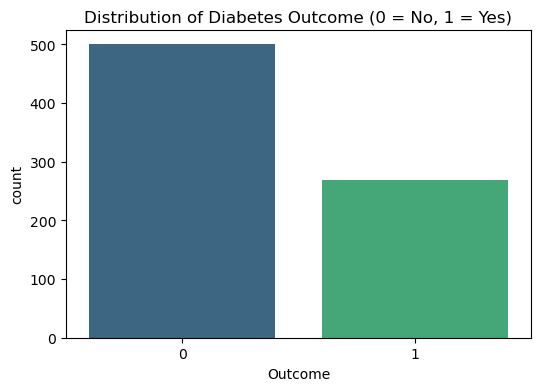

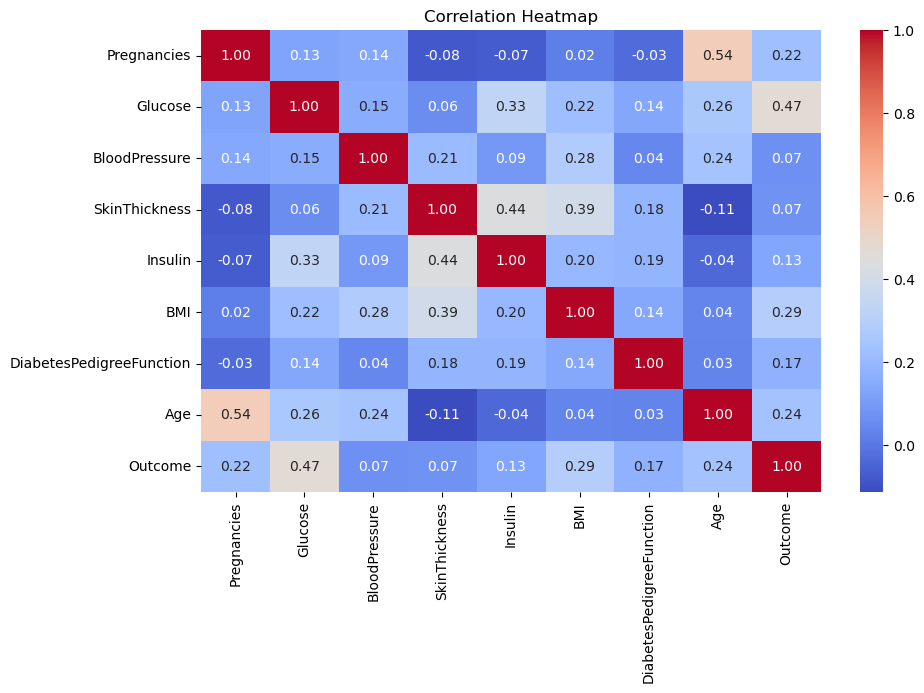


Model Performance:
Training Accuracy: 0.7866449511400652
Testing Accuracy: 0.7727272727272727

Enter the following patient details:


Number of Pregnancies:  3
Glucose Level:  34
Blood Pressure value:  4
Skin Thickness value:  56
Insulin Level:  45
BMI value:  3
Diabetes Pedigree Function value:  45
Age of the Person:  34



Prediction result:
⚠️ The person IS diabetic.


D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
# diabetes_predictor.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# ------------------------------
# Load dataset
# ------------------------------
diabetes_dataset = pd.read_csv(r'C:\Users\admin\Desktop\Akhil\Datasets\diabetes.csv')

print("\nDataset Info:")
print(diabetes_dataset.info())
print("\nFirst 5 rows:")
print(diabetes_dataset.head())

# ------------------------------
# Data Exploration & Visualization
# ------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=diabetes_dataset, palette="viridis")
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# Split features and labels
# ------------------------------
X = diabetes_dataset.drop(columns="Outcome", axis=1)
Y = diabetes_dataset["Outcome"]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

# ------------------------------
# Train Model
# ------------------------------
classifier = svm.SVC(kernel="linear")
classifier.fit(X_train, Y_train)

# Accuracy
train_acc = accuracy_score(classifier.predict(X_train), Y_train)
test_acc = accuracy_score(classifier.predict(X_test), Y_test)

print("\nModel Performance:")
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

# ------------------------------
# User Input Prediction
# ------------------------------
print("\nEnter the following patient details:")

pregnancies = float(input("Number of Pregnancies: "))
glucose = float(input("Glucose Level: "))
blood_pressure = float(input("Blood Pressure value: "))
skin_thickness = float(input("Skin Thickness value: "))
insulin = float(input("Insulin Level: "))
bmi = float(input("BMI value: "))
diabetes_pedigree = float(input("Diabetes Pedigree Function value: "))
age = float(input("Age of the Person: "))

# Prepare input
input_data = np.array(
    [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]
).reshape(1, -1)

# Standardize input
std_data = scaler.transform(input_data)

# Prediction
prediction = classifier.predict(std_data)[0]

print("\nPrediction result:")
if prediction == 0:
    print("✅ The person is NOT diabetic.")
else:
    print("⚠️ The person IS diabetic.")
